# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   [https://www.kaggle.com/datasets/mdismielhossenabir/sentiment-analysis]


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Import library untuk data manipulation dan analisis
import pandas as pd
import numpy as np
import os

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Import library untuk text preprocessing
import re
import string

# Import library untuk modeling (sesuaikan dengan kebutuhan)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Setting untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("Library berhasil diimport!")

Library berhasil diimport!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Memuat dataset dari file CSV
dataset_path = '../sentiment_analysis_raw/sentiment_analysis_raw.csv'

try:
    # Membaca dataset
    df = pd.read_csv(dataset_path)
    print("Dataset berhasil dimuat!")
    print(f"Jumlah baris: {df.shape[0]}")
    print(f"Jumlah kolom: {df.shape[1]}")
    
    # Menampilkan 5 baris pertama
    print("\nBeberapa baris pertama dataset:")
    display(df.head())
    
    # Informasi dataset
    print("\nInformasi Dataset:")
    df.info()
    
    # Untuk dataset sentiment analysis, tampilkan contoh text
    if 'text' in df.columns:
        print("\nContoh Text Data:")
        for i in range(min(3, len(df))):
            print(f"\n{i+1}. {df['text'].iloc[i]}")
            if 'sentiment' in df.columns:
                print(f"   Sentiment: {df['sentiment'].iloc[i]}")
    
except FileNotFoundError:
    print(f"File '{dataset_path}' tidak ditemukan!")

Dataset berhasil dimuat!
Jumlah baris: 499
Jumlah kolom: 7

Beberapa baris pertama dataset:


,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB

Contoh Text Data:

1. What a great day!!! Looks like dream.
   Sentiment: positive

2. I feel sorry, I miss you here in the sea beach
   Sentiment: positive

3. Don't angry me
   Sentiment: negative


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

STATISTIK DESKRIPTIF


,Year,Month,Day
count,499.000000,499.000000,499.000000
mean,2020.394790,6.084168,15.693387
std,2.830991,3.652711,8.804673
min,2010.000000,1.000000,1.000000
25%,2019.000000,2.000000,8.000000
50%,2021.000000,6.000000,15.000000
75%,2023.000000,9.000000,22.000000
max,2023.000000,12.000000,31.000000


TIPE DATA SETIAP KOLOM
Year              int64
Month             int64
Day               int64
Time of Tweet    object
text             object
sentiment        object
Platform         object
dtype: object
MISSING VALUES
Empty DataFrame
Columns: [Jumlah Missing, Persentase (%)]
Index: []
DATA DUPLIKAT
Jumlah baris duplikat: 105
DISTRIBUSI SENTIMENT
sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

Persentase:
sentiment
neutral     39.879760
positive    33.266533
negative    26.853707
Name: proportion, dtype: float64


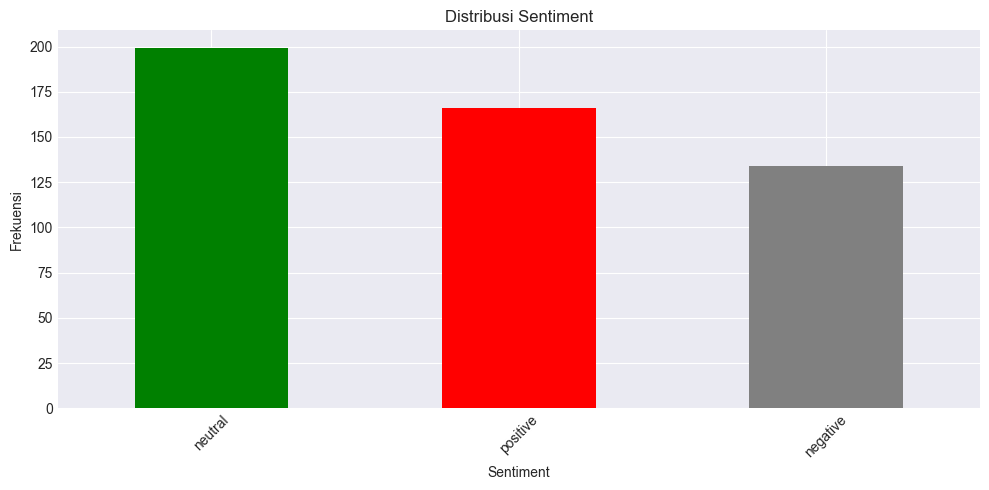

ANALISIS PANJANG TEXT
Rata-rata panjang karakter: 59.83
Rata-rata jumlah kata: 11.49


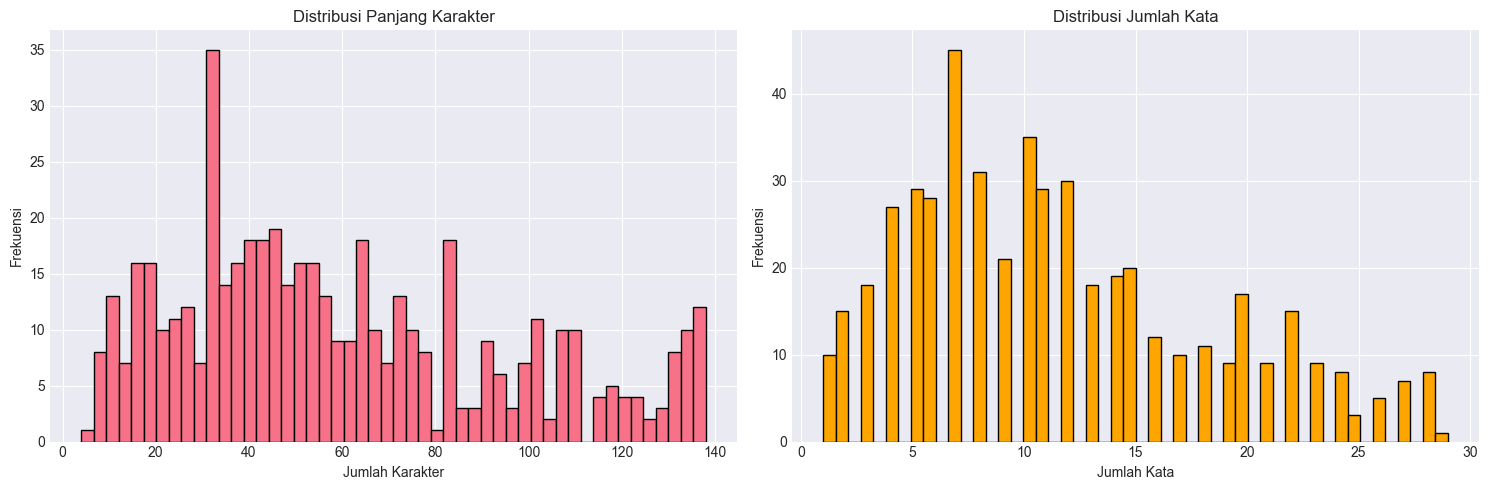

VISUALISASI DISTRIBUSI FITUR NUMERIK


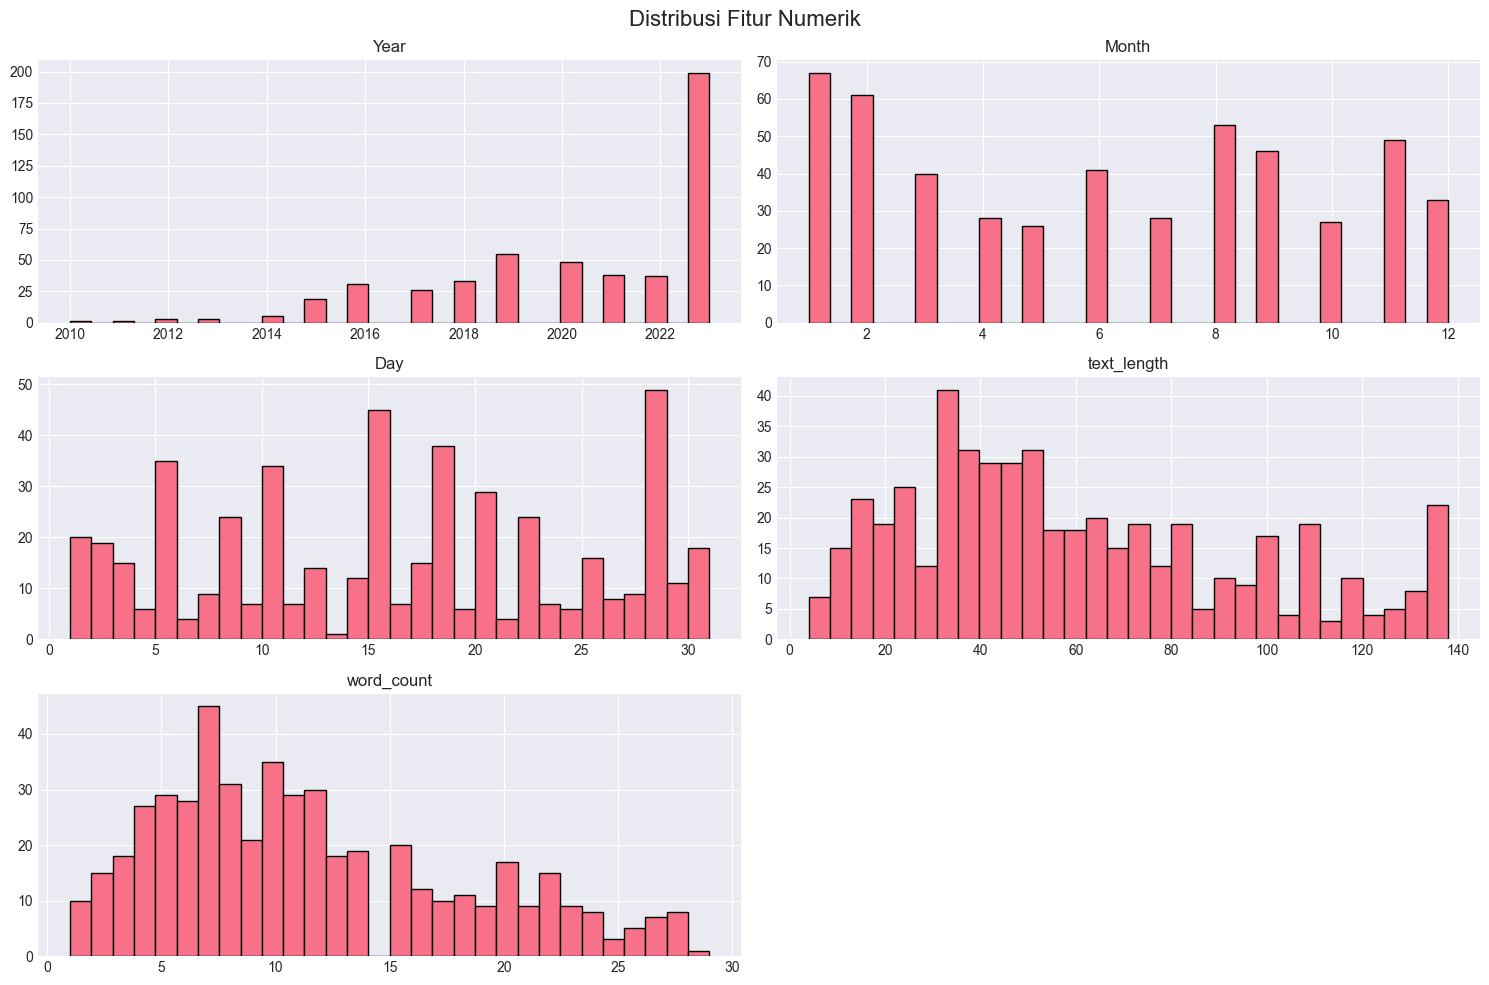

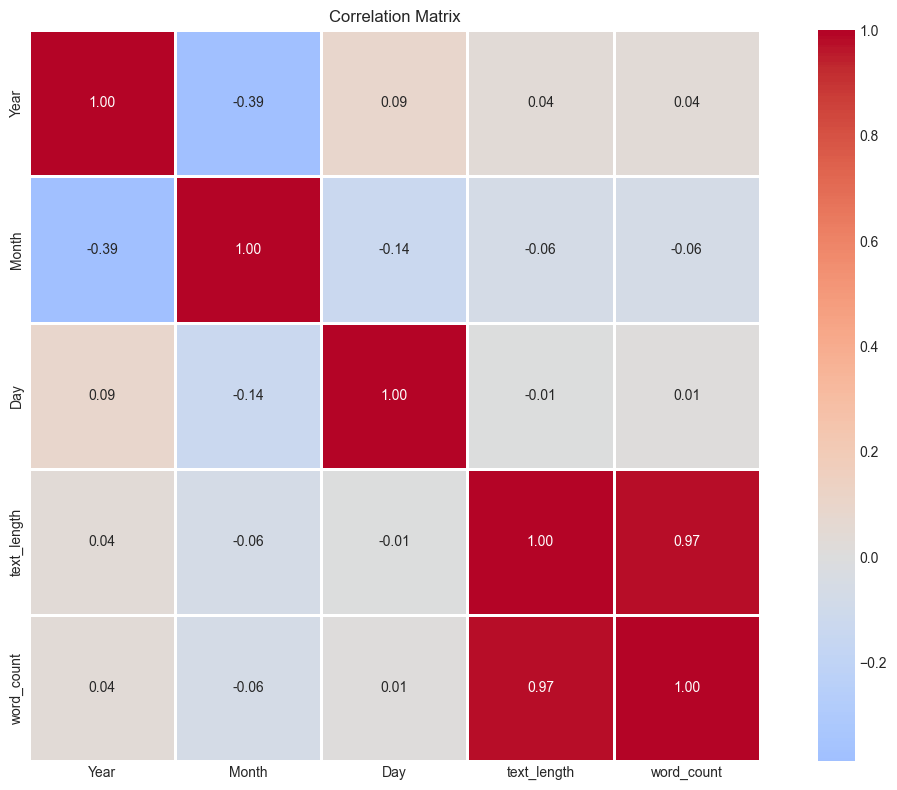

VISUALISASI FITUR KATEGORIKAL

Distribusi untuk kolom: Time of Tweet
Time of Tweet
morning    171
noon       167
night      161
Name: count, dtype: int64


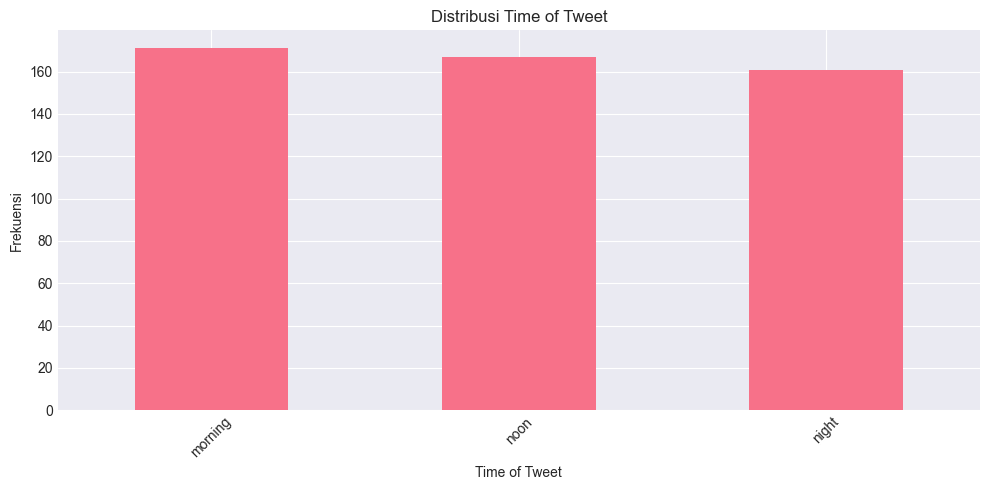


Distribusi untuk kolom: text
text
Grabbing coffee from  then making mom breakfast                                                                                               4
 Haha I know, I cant handle the fame!  and thank you!                                                                                         3
im thinking that im going to have fun tonight....and maybe some changes are coming                                                            3
 Im not bannished... but I am at work till 6                                                                                                  2
 Morning! If I get to see it, I`ll let you know. Right now, I`m going to go see Wolverine.                                                    2
                                                                                                                                             ..
Here`s a brief preview:   OMG James is creepy in that role! I`m scared of him                        

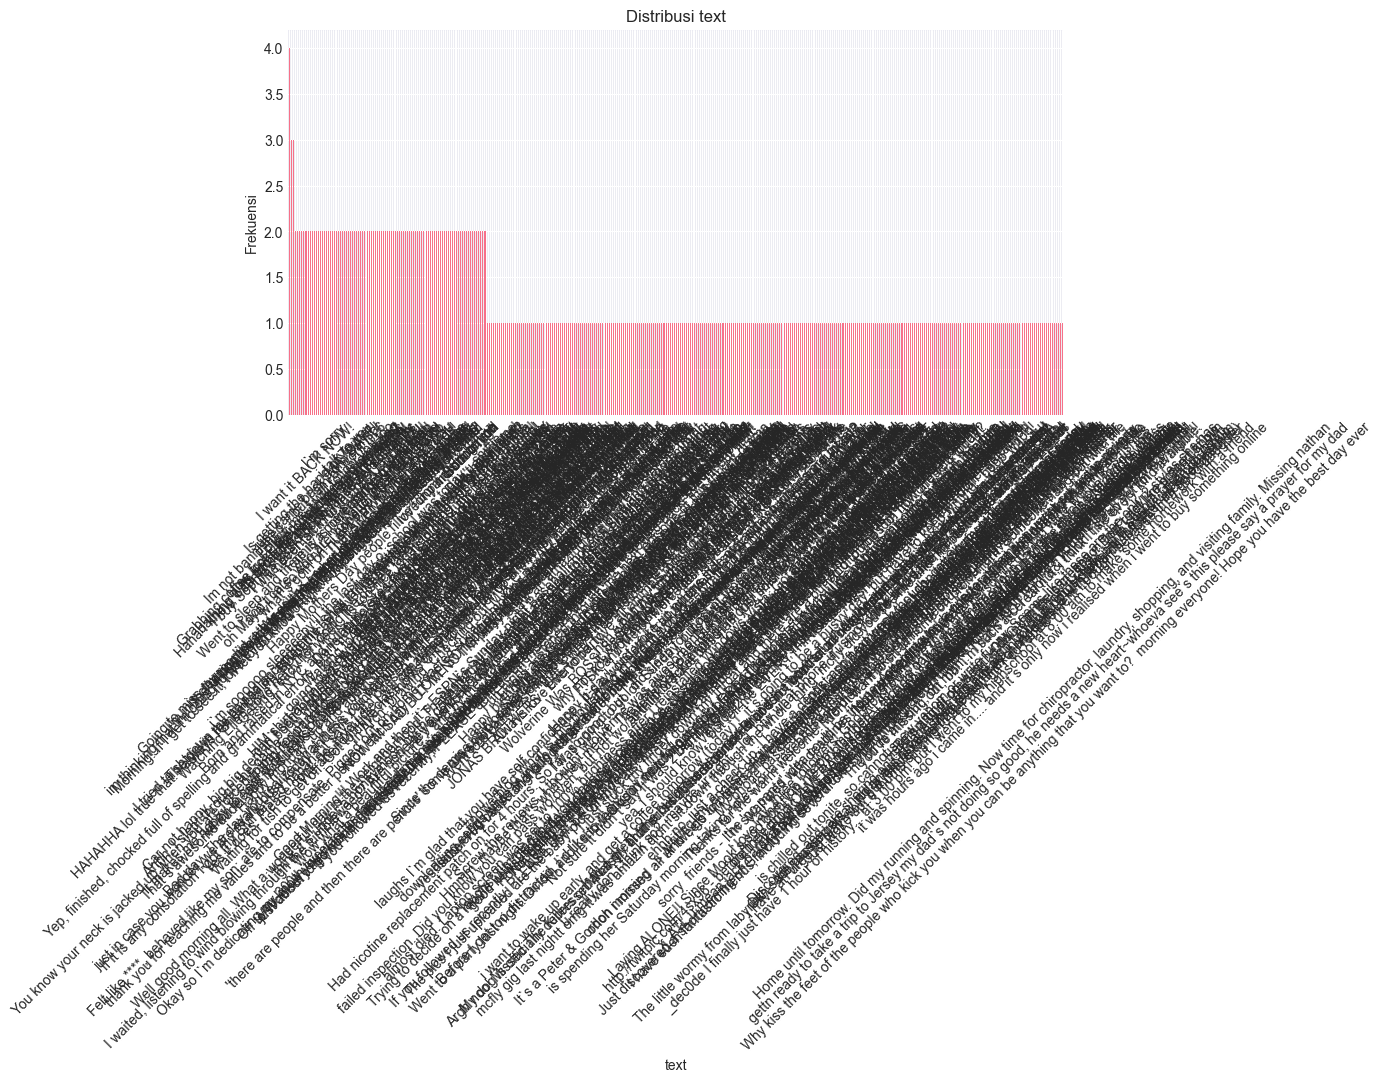


Distribusi untuk kolom: sentiment
sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64


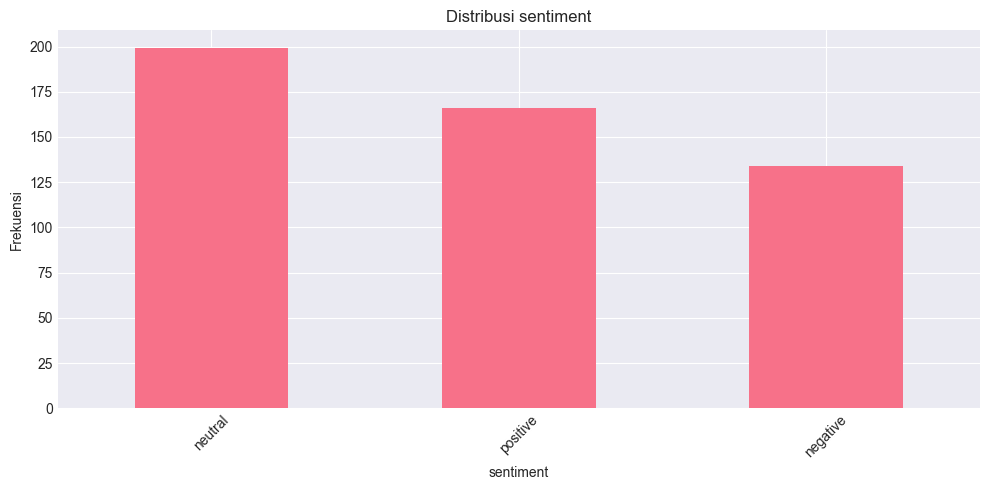


Distribusi untuk kolom: Platform
Platform
 Instagram     171
 Facebook      165
 Twitter        91
 Twitter        68
Facebook         4
Name: count, dtype: int64


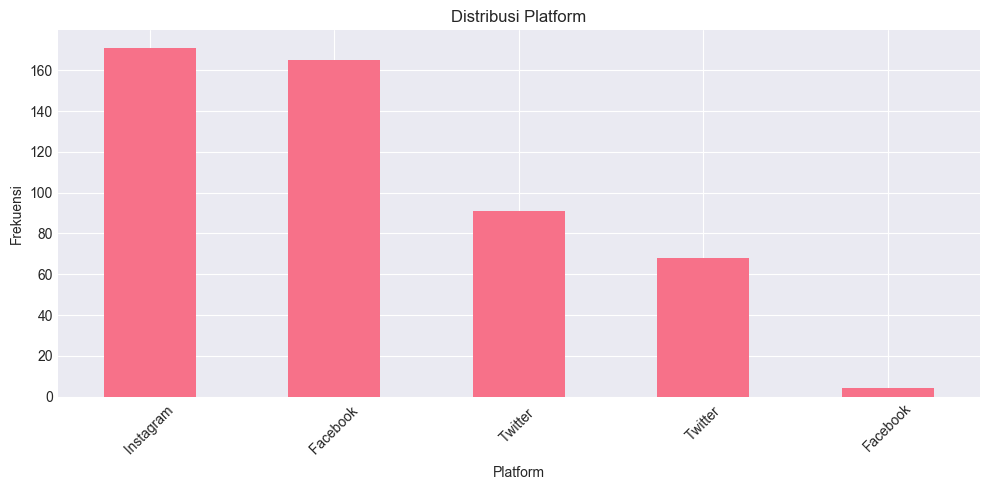

DETEKSI OUTLIERS


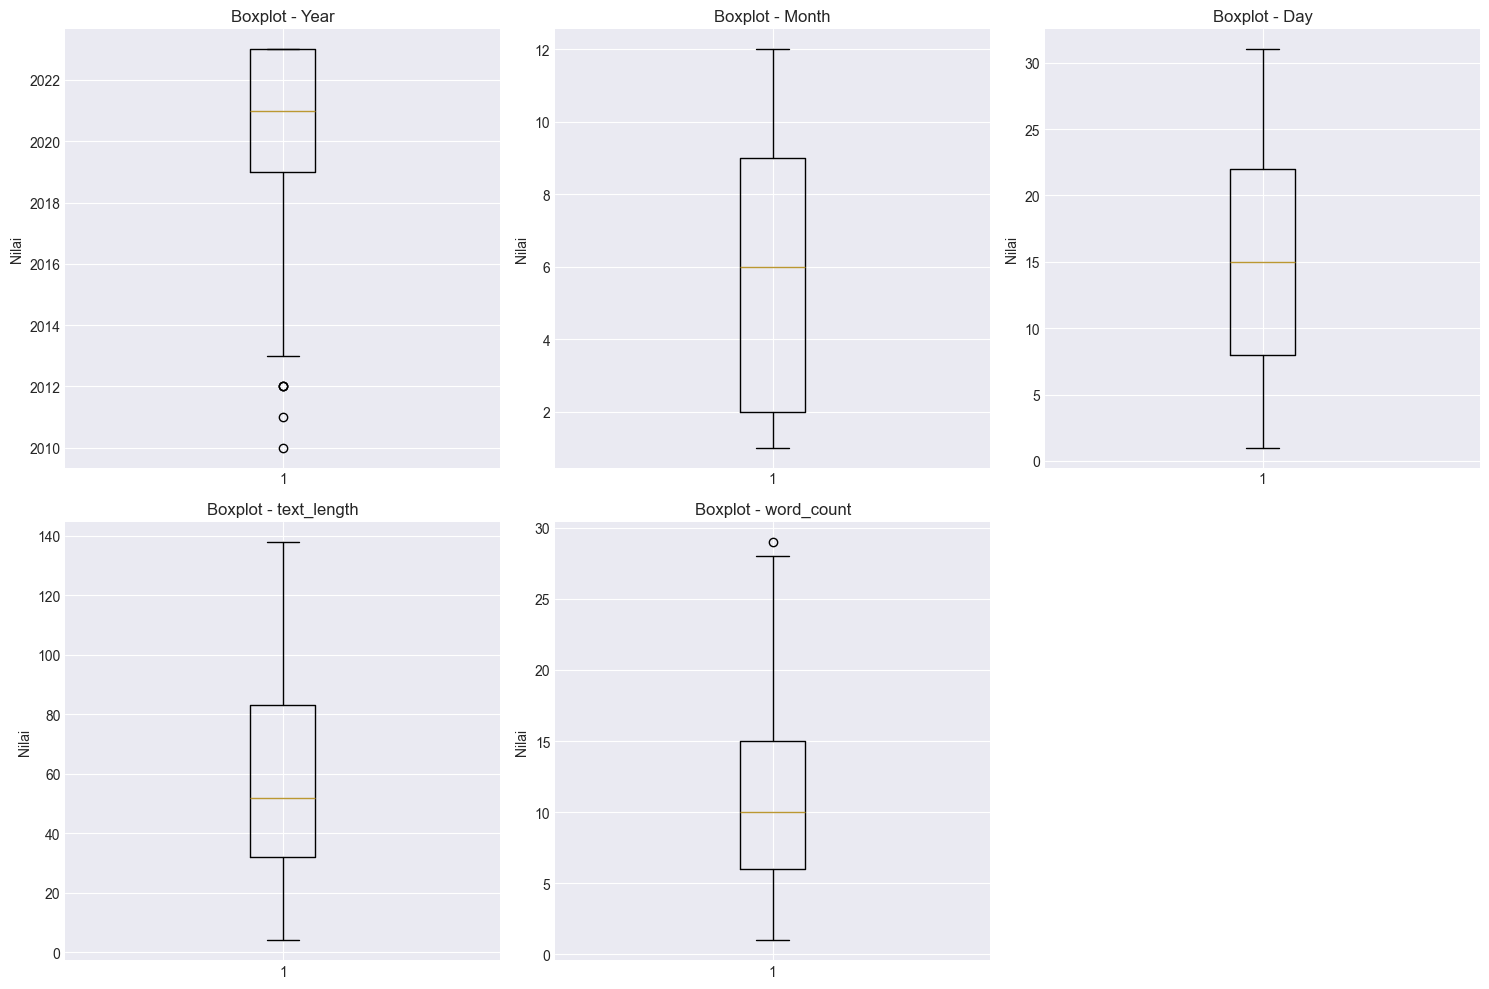

EXPLORATORY DATA ANALYSIS SELESAI


In [3]:
# 4.1 Statistik Deskriptif
print("STATISTIK DESKRIPTIF")
display(df.describe())

# 4.2 Informasi Tipe Data
print("TIPE DATA SETIAP KOLOM")
print(df.dtypes)

# 4.3 Cek Missing Values
print("MISSING VALUES")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Jumlah Missing': missing_values,
    'Persentase (%)': missing_percent
})
print(missing_df[missing_df['Jumlah Missing'] > 0])

# 4.4 Cek Data Duplikat
print("DATA DUPLIKAT")
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# 4.5 Distribusi Target Variable (Sentiment)
if 'sentiment' in df.columns:
    print("DISTRIBUSI SENTIMENT")
    print(df['sentiment'].value_counts())
    print("\nPersentase:")
    print(df['sentiment'].value_counts(normalize=True) * 100)
    
    plt.figure(figsize=(10, 5))
    df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
    plt.title('Distribusi Sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4.5b Analisis Text Length
if 'text' in df.columns:
    print("ANALISIS PANJANG TEXT")
    df['text_length'] = df['text'].str.len()
    df['word_count'] = df['text'].str.split().str.len()
    
    print(f"Rata-rata panjang karakter: {df['text_length'].mean():.2f}")
    print(f"Rata-rata jumlah kata: {df['word_count'].mean():.2f}")
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    axes[0].hist(df['text_length'], bins=50, edgecolor='black')
    axes[0].set_title('Distribusi Panjang Karakter')
    axes[0].set_xlabel('Jumlah Karakter')
    axes[0].set_ylabel('Frekuensi')
    
    axes[1].hist(df['word_count'], bins=50, edgecolor='black', color='orange')
    axes[1].set_title('Distribusi Jumlah Kata')
    axes[1].set_xlabel('Jumlah Kata')
    axes[1].set_ylabel('Frekuensi')
    
    plt.tight_layout()
    plt.show()

# 4.6 Visualisasi Distribusi Fitur Numerik
print("VISUALISASI DISTRIBUSI FITUR NUMERIK")

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if len(numeric_cols) > 0:
    # Histogram untuk semua kolom numerik
    df[numeric_cols].hist(figsize=(15, 10), bins=30, edgecolor='black')
    plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Correlation Matrix
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

# 4.7 Visualisasi Fitur Kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if len(categorical_cols) > 0:
    print("VISUALISASI FITUR KATEGORIKAL")
    
    for col in categorical_cols[:5]:  # Batasi 5 kolom pertama
        print(f"\nDistribusi untuk kolom: {col}")
        print(df[col].value_counts())
        
        plt.figure(figsize=(10, 5))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribusi {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 4.8 Deteksi Outliers menggunakan Boxplot
if len(numeric_cols) > 0:
    print("DETEKSI OUTLIERS")
    
    # Boxplot untuk kolom numerik
    fig, axes = plt.subplots(nrows=(len(numeric_cols)//3)+1, ncols=3, 
                             figsize=(15, 5*((len(numeric_cols)//3)+1)))
    axes = axes.flatten()
    
    for idx, col in enumerate(numeric_cols):
        axes[idx].boxplot(df[col].dropna())
        axes[idx].set_title(f'Boxplot - {col}')
        axes[idx].set_ylabel('Nilai')
    
    # Hapus subplot kosong
    for idx in range(len(numeric_cols), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

print("EXPLORATORY DATA ANALYSIS SELESAI")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
# 5.1 Handle Missing Values
print("HANDLE MISSING VALUES")

# Cek missing values
print("\nMissing values sebelum preprocessing:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Membuat copy dataset
df_processed = df.copy()

# Strategi untuk numerik: isi dengan median
numeric_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if df_processed[col].isnull().sum() > 0:
        median_value = df_processed[col].median()
        df_processed[col].fillna(median_value, inplace=True)
        print(f"Kolom '{col}': Missing values diisi dengan median ({median_value})")

# Strategi untuk kategorikal dan text
categorical_cols = df_processed.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        if col == 'text':
            # Untuk text, hapus baris yang kosong
            rows_before = df_processed.shape[0]
            df_processed = df_processed.dropna(subset=['text'])
            rows_removed = rows_before - df_processed.shape[0]
            print(f"Kolom 'text': {rows_removed} baris dengan text kosong dihapus")
        else:
            mode_value = df_processed[col].mode()[0]
            df_processed[col].fillna(mode_value, inplace=True)
            print(f"Kolom '{col}': Missing values diisi dengan modus ({mode_value})")

print("\nMissing values setelah preprocessing:")
print(df_processed.isnull().sum().sum())

# 5.2 Handle Duplicate Data
print("HANDLE DUPLICATE DATA")

duplicates_before = df_processed.duplicated().sum()
print(f"Jumlah duplikat sebelum: {duplicates_before}")

df_processed = df_processed.drop_duplicates()

duplicates_after = df_processed.duplicated().sum()
print(f"Jumlah duplikat setelah: {duplicates_after}")
print(f"Jumlah baris setelah remove duplikat: {df_processed.shape[0]}")

# 5.3 Text Preprocessing
if 'text' in df_processed.columns:
    print("TEXT PREPROCESSING")
    
    def clean_text(text):
        """Membersihkan text dari noise"""
        # Lowercase
        text = text.lower()
        # Hapus URL
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Hapus mention dan hashtag
        text = re.sub(r'@\w+|#\w+', '', text)
        # Hapus angka
        text = re.sub(r'\d+', '', text)
        # Hapus tanda baca
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Hapus whitespace berlebih
        text = ' '.join(text.split())
        return text
    
    # Terapkan text cleaning
    df_processed['text_clean'] = df_processed['text'].apply(clean_text)
    print("Text berhasil dibersihkan!")
    
    # Tampilkan contoh sebelum dan sesudah
    print("\nContoh text sebelum dan sesudah cleaning:")
    for i in range(min(2, len(df_processed))):
        print(f"\nOriginal: {df_processed['text'].iloc[i]}")
        print(f"Cleaned:  {df_processed['text_clean'].iloc[i]}")

# 5.4 Encoding Categorical Variables
print("ENCODING CATEGORICAL VARIABLES")

# Label Encoding untuk kolom kategorikal (kecuali text)
label_encoders = {}
categorical_cols = df_processed.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col not in ['text', 'text_clean']:  # Skip text columns
        le = LabelEncoder()
        df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
        print(f"Kolom '{col}' berhasil di-encode")

# 5.5 Text Vectorization (TF-IDF)
print("TEXT VECTORIZATION (TF-IDF)")

if 'text_clean' in df_processed.columns:
    # Membuat TF-IDF vectorizer
    tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
    
    # Fit dan transform text
    text_features = tfidf.fit_transform(df_processed['text_clean'])
    
    # Convert ke DataFrame
    text_features_df = pd.DataFrame(
        text_features.toarray(),
        columns=[f'tfidf_{i}' for i in range(text_features.shape[1])],
        index=df_processed.index
    )
    
    print(f"TF-IDF features dibuat: {text_features_df.shape[1]} features")
    print(f"Shape: {text_features_df.shape}")
    
    # Gabungkan dengan fitur numerik lainnya
    numeric_features = df_processed.select_dtypes(include=['int64', 'float64'])
    
    # Gabungkan semua fitur (exclude sentiment columns)
    if 'sentiment_encoded' in numeric_features.columns:
        numeric_features = numeric_features.drop('sentiment_encoded', axis=1)
    
    X_combined = pd.concat([text_features_df, numeric_features], axis=1)
    print(f"\nTotal fitur setelah kombinasi: {X_combined.shape[1]}")
else:
    X_combined = df_processed.select_dtypes(include=['int64', 'float64'])

# 5.6 Feature Scaling untuk fitur numerik
print("FEATURE SCALING")

# Hanya scale fitur numerik non-TF-IDF
numeric_cols_to_scale = [col for col in X_combined.columns if not col.startswith('tfidf_')]

if len(numeric_cols_to_scale) > 0:
    scaler = MinMaxScaler()
    X_combined[numeric_cols_to_scale] = scaler.fit_transform(X_combined[numeric_cols_to_scale])
    print(f"Feature scaling selesai untuk {len(numeric_cols_to_scale)} kolom numerik")

print(f"Shape data final: {X_combined.shape}")

# 5.7 Split Data (Train-Test)
print("SPLIT DATA (TRAIN-TEST)")

# Pisahkan target (sentiment)
if 'sentiment_encoded' in df_processed.columns:
    y = df_processed.loc[X_combined.index, 'sentiment_encoded']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_combined, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"Data training: {X_train.shape[0]} samples")
    print(f"Data testing: {X_test.shape[0]} samples")
    print(f"Fitur: {X_train.shape[1]}")
    print(f"\nDistribusi kelas di training set:")
    print(pd.Series(y_train).value_counts())
    print(f"\nDistribusi kelas di testing set:")
    print(pd.Series(y_test).value_counts())
elif 'sentiment' in df_processed.columns:
    # Jika belum di-encode, encode dulu
    le = LabelEncoder()
    y = le.fit_transform(df_processed.loc[X_combined.index, 'sentiment'])
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_combined, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"Data training: {X_train.shape[0]} samples")
    print(f"Data testing: {X_test.shape[0]} samples")
    print(f"Fitur: {X_train.shape[1]}")
else:
    X_train, X_test = train_test_split(X_combined, test_size=0.2, random_state=42)
    y_train, y_test = None, None
    print(f"Data training: {X_train.shape[0]} samples")
    print(f"Data testing: {X_test.shape[0]} samples")

# 5.8 Simpan Data Preprocessing
print("SIMPAN DATA HASIL PREPROCESSING")

# Simpan full preprocessed CSV ke folder preprocessing (lokasi notebook)
preproc_dir = '.'
output_preproc_path = os.path.join(preproc_dir, 'sentiment_analysis_preprocessing.csv')
df_processed.to_csv(output_preproc_path, index=False)
print(f"Data preprocessing berhasil disimpan ke '{output_preproc_path}'")

# Simpan train/test ke folder model di root repo
model_dir = os.path.join('..', '..', 'Membangun_model', 'sentiment_analysis_preprocessing')
os.makedirs(model_dir, exist_ok=True)

if y_train is not None:
    train_data = X_train.copy()
    train_data['sentiment'] = y_train
    
    test_data = X_test.copy()
    test_data['sentiment'] = y_test
else:
    train_data = X_train
    test_data = X_test

train_output_path = os.path.join(model_dir, 'train_data.csv')
test_output_path = os.path.join(model_dir, 'test_data.csv')
train_data.to_csv(train_output_path, index=False)
test_data.to_csv(test_output_path, index=False)
print(f"Data training dan testing berhasil disimpan ke folder '{model_dir}'")

print("DATA PREPROCESSING SELESAI!")
print("\nRingkasan:")
print(f"- Dataset original: {df.shape[0]} baris, {df.shape[1]} kolom")
print(f"- Dataset setelah preprocessing: {df_processed.shape[0]} baris")
print(f"- Total fitur setelah TF-IDF: {X_combined.shape[1]} fitur")
print(f"- Data training: {X_train.shape[0]} samples")
print(f"- Data testing: {X_test.shape[0]} samples")

HANDLE MISSING VALUES

Missing values sebelum preprocessing:
Series([], dtype: int64)

Missing values setelah preprocessing:
0
HANDLE DUPLICATE DATA
Jumlah duplikat sebelum: 105
Jumlah duplikat setelah: 0
Jumlah baris setelah remove duplikat: 394
TEXT PREPROCESSING
Text berhasil dibersihkan!

Contoh text sebelum dan sesudah cleaning:

Original: What a great day!!! Looks like dream.
Cleaned:  what a great day looks like dream

Original: I feel sorry, I miss you here in the sea beach
Cleaned:  i feel sorry i miss you here in the sea beach
ENCODING CATEGORICAL VARIABLES
Kolom 'Time of Tweet' berhasil di-encode
Kolom 'sentiment' berhasil di-encode
Kolom 'Platform' berhasil di-encode
TEXT VECTORIZATION (TF-IDF)
TF-IDF features dibuat: 1000 features
Shape: (394, 1000)

Total fitur setelah kombinasi: 1005
FEATURE SCALING
Feature scaling selesai untuk 5 kolom numerik
Shape data final: (394, 1005)
SPLIT DATA (TRAIN-TEST)
Data training: 315 samples
Data testing: 79 samples
Fitur: 1005

Distribus

In [7]:
# 6. Otomatisasi: Jalankan pipeline dari file automate
from automate_SatyaAdnyanaPutera import SentimentDataPreprocessor
import os

# Path relatif dari notebook ke dataset mentah
raw_csv = os.path.join('..', 'sentiment_analysis_raw', 'sentiment_analysis_raw.csv')
# Simpan full CSV di folder preprocessing (lokasi notebook)
output_csv = os.path.join('.', 'sentiment_analysis_preprocessing.csv')
# Simpan train/test ke folder model di root repo
model_dir = os.path.join('..', '..', 'Membangun_model', 'sentiment_analysis_preprocessing')

preprocessor = SentimentDataPreprocessor(verbose=True)
processed_df = preprocessor.preprocess(
    filepath=raw_csv,
    save_output=True,
    output_path=output_csv,
    save_train_test=True,
    train_test_output_dir=model_dir
)

print("\nSample data hasil automate (5 baris teratas):")
display(processed_df.head())

SENTIMENT ANALYSIS DATA PREPROCESSING PIPELINE
Dataset berhasil dimuat!
  Jumlah baris: 499
  Jumlah kolom: 7
HANDLE MISSING VALUES

Total missing values setelah: 0
HANDLE DUPLICATE DATA

Duplicate rows sebelum: 105
Duplicate rows setelah: 0
Removed 105 duplicate rows
TEXT CLEANING

Performing text cleaning...
Removed 0 empty text entries
Rows after text cleaning: 394
ENCODING CATEGORICAL VARIABLES

Encoding Sentiment...
Sentiment Mapping: {'negative': 0, 'neutral': 1, 'positive': 2}

Encoding Platform...
Platform Mapping: {'Facebook': 0, 'Instagram': 1, 'Twitter': 2}

Encoding Time of Tweet...
Time Mapping: {'morning': 0, 'night': 1, 'noon': 2}

Encoding completed!
FEATURE EXTRACTION (TF-IDF)

Performing TF-IDF vectorization...
TF-IDF Matrix Shape: (394, 1000)
Number of features: 1000
Top 10 features: ['10', '10 years', '100', '100 brightness', '1130', '1130 wait', '140', '140 character', '15', '15 mins']
Feature matrix shape: (394, 1005)
PREPROCESSING SUMMARY

Original dataset:
  Row

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,sentiment_encoded,platform_encoded,time_encoded
0,2018,8,18,morning,what a great day looks like dream,positive,Twitter,2,2,0
1,2018,8,18,noon,i feel sorry i miss you here in the sea beach,positive,Facebook,2,0,2
2,2017,8,18,night,dont angry me,negative,Facebook,0,0,1
3,2022,6,8,morning,we attend in the class just for listening teac...,negative,Facebook,0,0,0
4,2022,6,8,noon,those who want to go let them go,negative,Instagram,0,1,2
